# Random Forest

In [37]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [38]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

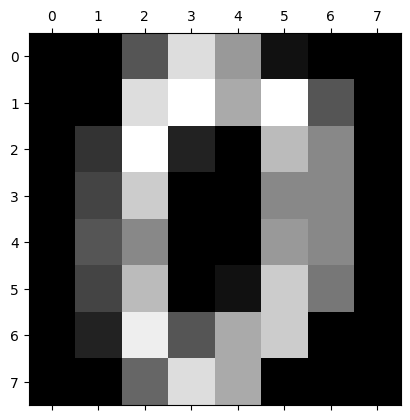

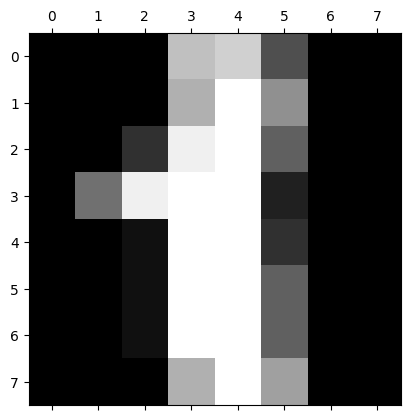

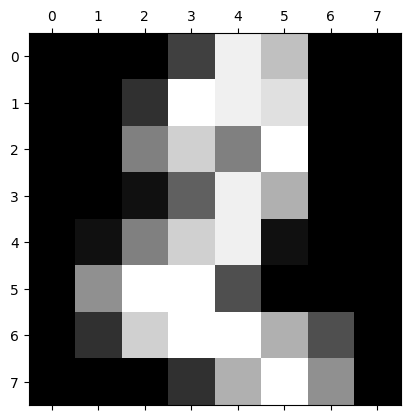

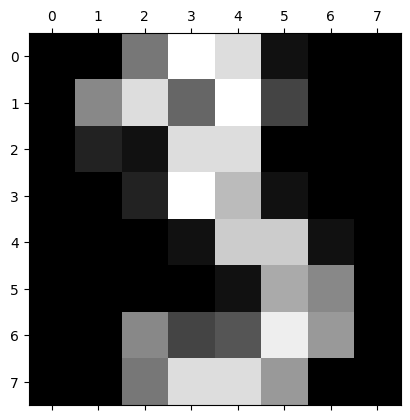

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [40]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [41]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


Train the Model and Prediction

In [42]:
X = df.drop('target',axis='columns')
y = df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [45]:
model.score(X_test, y_test)

0.975

In [46]:
y_predict = model.predict(X_test)
y_predict

array([4, 8, 8, 3, 1, 5, 0, 1, 2, 7, 2, 0, 6, 4, 6, 4, 6, 8, 4, 6, 9, 5,
       7, 2, 5, 9, 5, 5, 3, 8, 2, 7, 9, 9, 4, 3, 7, 0, 9, 2, 6, 9, 4, 6,
       2, 5, 5, 2, 6, 7, 4, 1, 0, 6, 3, 0, 4, 0, 0, 2, 0, 1, 4, 2, 4, 6,
       9, 0, 5, 8, 9, 0, 3, 1, 9, 1, 5, 0, 1, 8, 1, 6, 4, 7, 6, 7, 7, 2,
       1, 1, 0, 0, 8, 9, 9, 7, 6, 6, 0, 1, 4, 4, 7, 5, 6, 2, 2, 7, 0, 8,
       7, 3, 6, 3, 7, 1, 5, 3, 5, 1, 8, 0, 7, 0, 8, 4, 8, 1, 6, 2, 5, 0,
       8, 1, 5, 3, 3, 6, 6, 3, 4, 3, 5, 3, 2, 3, 1, 9, 7, 6, 1, 6, 7, 2,
       1, 1, 2, 8, 6, 7, 2, 7, 6, 4, 1, 8, 4, 9, 5, 8, 0, 8, 9, 0, 4, 8,
       3, 2, 6, 7, 3, 2, 8, 5, 9, 5, 7, 9, 7, 3, 0, 1, 1, 3, 3, 1, 4, 8,
       0, 2, 1, 8, 8, 4, 4, 7, 3, 1, 2, 3, 5, 1, 2, 2, 9, 8, 9, 5, 5, 1,
       0, 4, 9, 2, 3, 9, 9, 4, 9, 9, 7, 0, 1, 5, 3, 4, 1, 2, 7, 1, 2, 2,
       8, 4, 6, 4, 7, 9, 4, 2, 4, 5, 3, 7, 6, 1, 3, 5, 4, 1, 7, 4, 7, 8,
       6, 4, 0, 8, 9, 2, 3, 0, 2, 7, 8, 0, 6, 6, 2, 6, 7, 1, 0, 2, 8, 1,
       6, 2, 1, 0, 4, 5, 8, 2, 9, 2, 3, 5, 2, 3, 7,

Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[33,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 26]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

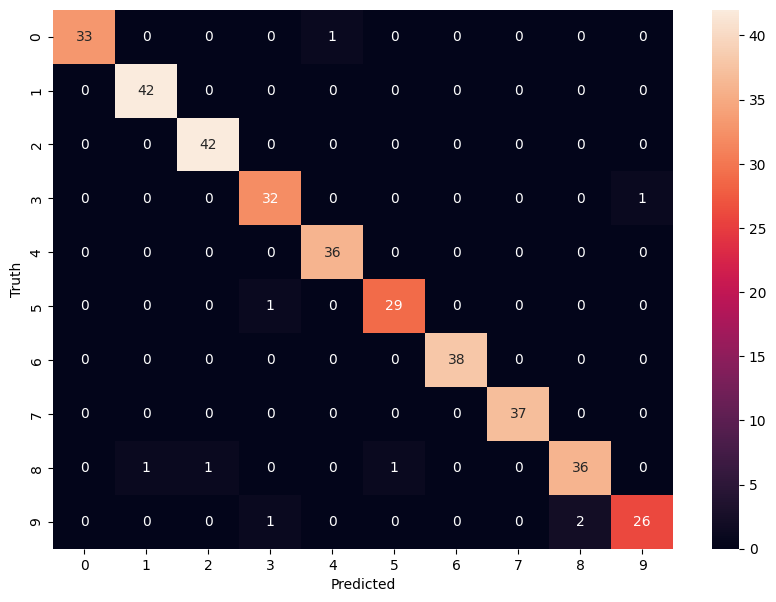

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')